#### Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [3]:
# сгенерируем набор данных
data, target, coef = datasets.make_regression(n_samples=10000, n_features = 3, n_informative = 3, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [4]:
data

array([[-0.90316557,  0.03372336,  0.61542915],
       [-0.86167817, -0.12452019,  0.73955777],
       [-1.08723288,  1.31831521, -1.43788454],
       ...,
       [ 2.82369416, -1.63346567, -0.134754  ],
       [-1.08721296, -1.31608948, -0.95716041],
       [-0.55181846,  0.99008189,  0.53983347]])

In [5]:
coef

array([14.61295732, 15.50017954, 90.18332957])

In [6]:
# Получим средние значения и стандартное отклонение по столбцам
 
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
#(см. документацию в разделе источников)
 
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [7]:
means

array([-0.00318119, -0.01615968,  0.00911972])

In [8]:
stds

array([1.00367693, 1.00067703, 1.00739958])

In [9]:
data

array([[-0.89668732,  0.04984929,  0.60185595],
       [-0.85535191, -0.10828719,  0.72507281],
       [-1.08008031,  1.33357202, -1.43637569],
       ...,
       [ 2.81651922, -1.61621176, -0.14281694],
       [-1.08006046, -1.2990503 , -0.95918259],
       [-0.54662736,  1.00556077,  0.52681553]])

In [10]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [15]:
# инициализируем начальный вектор весов
w = np.zeros(3)
 
# список векторов весов после каждой итерации
w_list = [w.copy()]
 
# список значений ошибок после каждой итерации
errors = []
 
# шаг градиентного спуска
eta = 0.5
 
# максимальное число итераций
max_iter = 1e5
 
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8
 
# зададим начальную разницу весов большим числом
weight_dist = np.inf
 
# счетчик итераций
iter_num = 0
 
np.random.seed(1234)
 
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]
 
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, target))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
 
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 25.1997


In [17]:
# инициализируем начальный вектор весов
w_2 = np.zeros(3)
 
# список векторов весов после каждой итерации
w_2_list = [w_2.copy()]
 
# список значений ошибок после каждой итерации
errors_2 = []
 
# шаг градиентного спуска
eta = 0.5
 
# максимальное число итераций
max_iter = 1e5
 
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8
 
# зададим начальную разницу весов большим числом
weight_dist = np.inf
 
# счетчик итераций
iter_num = 0
 
np.random.seed(1234)
 
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    ##train_ind = np.random.randint(data.shape[0])
    
    new_w_2 = w_2 - 2 * eta * np.dot(data.T, (np.dot(data, w_2) - target)) / target.shape[0]
    weight_dist = np.linalg.norm(new_w_2 - w_2, ord=2)
    
    w_2_list.append(new_w_2.copy())
    errors_2.append(mserror(data, new_w_2, target))
    
    iter_num += 1
    w_2 = new_w_2
    print(iter_num, mserror(data, new_w_2, target), eta)
    
w_2_list = np.array(w_2_list)
 
print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors_2[-1], 4)}')

1 25.94795348132044 0.5
2 24.633597587628632 0.5
3 24.63314357018767 0.5
4 24.633143389663598 0.5
5 24.63314338958838 0.5
6 24.633143389588433 0.5
7 24.633143389588373 0.5
В случае использования градиентного спуска функционал ошибки составляет 24.6331


Text(0, 0.5, 'MSE')

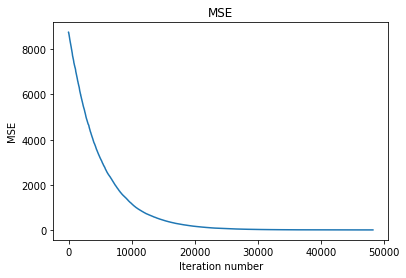

In [18]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE 2')

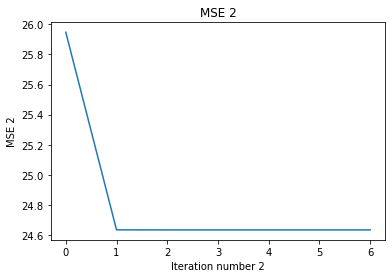

In [19]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors_2)), errors_2)
plt.title('MSE 2')
plt.xlabel('Iteration number 2')
plt.ylabel('MSE 2')